# MÓDULO 5: Aprendizaje de Máquina Supervisado

- Nombre alumno: Sebastián Menares Arriaza


# Tema : Aprendizaje de máquina supervisado

## Objetivo del proyecto (Competencias del módulo)

Elaborar un modelo predictivo a partir de un set de datos
utilizando técnicas de aprendizaje de máquina supervisado
implementados en lenguaje Python para resolver un problema.

## Descripción del ejercicio
### Contexto
Utilizaremos un set de datos de las policias de New York del año 2009
y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán
información de los procedimientos policiales realizados. Además se le
entregará el diccionario de variables para que pueda consultar que
significa cada categoría dentro de las variables.

● La variable respuesta 'arstmade' informa si los procedimientos
policiales han terminado en arresto o no, y el objetivo será realizar
un modelo de Machine Learning para predecir si un futuro
procedimiento terminará en arresto.

## Descripción del ejercicio
### Contexto
Utilizaremos un set de datos de las policias de New York del año 2009
y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán
información de los procedimientos policiales realizados. Además se le
entregará el diccionario de variables para que pueda consultar que
significa cada categoría dentro de las variables.

● La variable respuesta 'arstmade' informa si los procedimientos
policiales han terminado en arresto o no, y el objetivo será realizar
un modelo de Machine Learning para predecir si un futuro
procedimiento terminará en arresto.

1. Enliste todas las librerías que utilizará
Nota: Se recomienda ir actualizando la lista conforme las necesidades
vaya teniendo durante el desarrollo de la prueba
2. Importación y revisión de los datos
Importe ambos sets. Dado que la fuente de datos proviene de la misma
base, tienen las mismas columnas. Consolide ambos sets y reporte una
exploración básica de los datos (número de filas/columnas, tipos de
datos, estadísticas básicas, casos perdidos)
3. Preprocesamiento de datos
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga
los siguientes pasos para limpiar este set:

  - 3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables
tipo categóricas

  - 3.2 Reemplace las siguientes clases faltantes:
  - Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'
  - Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor

  Nota, los valores significan {N: No, Y: Yes, U: Unknown}

  - 3.3 Transforme las columnas ht_feet junto con ht_inch en una
única columna (de la forma "ht_feet.ht_inch") llamado 'meters'
(hint: transforme con el siguiente cálculo: metros =
(pies+pulgadas)*0.3048)
  - 3.4 Note que la fecha viene en un formato MMDDAAAA en la
columna datestop. Genere 2 nuevas columnas llamadas month y
year que solo tenga el mes y el año respectivamente.
  - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en
el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje
los registros cuyas edades estén entre 18 y 100 años, ambos
inclusive.

4. Análisis exploratorio
  - 4.1 Estudie la variable respuesta por si sola (arstmade), puede
ayudarse de un gráfico. Comente
  - 4.2.- Estudie la relación de la variable respuesta en
comportamiento con la raza (race), comente.
  - 4.3 Estudie la relación de la variable respuesta en
comportamiento con la sexo (sex), comente.
  - 4.3 Estudie la relación de la variable respuesta en
comportamiento con la sexo y la edad en su conjunto, comente.
  - 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es
Y
  - 4.5 Muestre en un gráfico la probabilidad que un individuo sea
arrestado, condicional al género y a la raza. ¿qué implicancias
éticas tienen algunas conclusiones de lo que observa?.

5. Determinar si el procedimiento policial concluirá en alguna acción
violenta.
  - Los atributos que tienen el prefijo
  pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y
['pf_other'])
indican si hubo fuerza fisica utilizada por el oficial al
momento del procedimiento, con la marca 'Y'.
Genere una nueva variable llamada 'violencia' la cual sea 1 si en
cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego
indique el porcentaje de casos que terminaron con violencia.

6. Modelación
  - 6.1 Genere las variables dummies correspondientes (Tenga
cuidado de no utilizar variables que expliquen lo mismo,
¡recuerde que acaba de crear una variable a partir de otras!,
además recuerde que creó una variable numérica que es una
categoría :) ). Luego genere los sets de train-test utilizando el año
2009 para entrenar, y el año 2010 para testear.
  - 6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo
bajo algún criterio. Utilice validación cruzada de al menos 2 folds
para probar distintos hiperparámetros para cada modelo (puede
probar cualquier hiperparámetro, pero debe ser al menos uno).

7. Bonus (20 pts)
¿Qué puede hacer para mejorar la predicción de los modelos?

# 1. librerias

```
# Tiene formato de código
```



1. Enliste todas las librerías que utilizará
Nota: Se recomienda ir actualizando la lista conforme las necesidades
vaya teniendo durante el desarrollo de la prueba


In [5]:

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sys


# 2. Importacion


2. Importación y revisión de los datos
Importe ambos sets. Dado que la fuente de datos proviene de la misma
base, tienen las mismas columnas. Consolide ambos sets y reporte una
exploración básica de los datos (número de filas/columnas, tipos de
datos, estadísticas básicas, casos perdidos)


In [6]:
# prompt: cargue el set de datos desde drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/CienciaDatos/2024/M5/Sprint/2009_1perc.csv
#/content/drive/MyDrive/CienciaDatos/2024/M5/Sprint/2010_1perc.csv

In [7]:
import pandas as pd

# Rutas de los archivos CSV
archivo_2009 = "/content/drive/MyDrive/CienciaDatos/2024/M5/Sprint/2009_1perc.csv"
archivo_2010 = "/content/drive/MyDrive/CienciaDatos/2024/M5/Sprint/2010_1perc.csv"

# Cargar los datos
datos_2009 = pd.read_csv(archivo_2009)
datos_2010 = pd.read_csv(archivo_2010)


In [8]:
datos_2009.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [9]:
datos_2010.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,30569,2010,6,487,1192010,1420,1,O,P,2,...,,6,G,,38,983543,208767,CM,1,85
1,416235,2010,42,7138,9042010,225,1,I,T,10,...,,42,E,,,1014172,241737,CM,1,45
2,318345,2010,33,2628,6302010,1240,1,I,T,5,...,,33,B,6,,1000916,245710,CM,1,85
3,541524,2010,108,6384,11172010,2338,1,O,P,3,...,,108,J,,,1012612,212240,CM,1,28
4,113101,2010,14,2295,3072010,2240,1,I,T,5,...,,14,C,7,,987636,212439,CM,1,20


In [10]:
# Consolidar ambos conjuntos de datos
datos = pd.concat([datos_2009, datos_2010], ignore_index=True)

# Exploración básica de los datos
print("Número de filas y columnas:", datos.shape)
print("\nTipos de datos:")
print(datos.dtypes)
print("\nEstadísticas básicas:")
print(datos.describe())
print("\nCasos perdidos por columna:")
print(datos.isnull().sum())


Número de filas y columnas: (11825, 112)

Tipos de datos:
Unnamed: 0     int64
year           int64
pct            int64
ser_num        int64
datestop       int64
               ...  
xcoord        object
ycoord        object
dettypcm      object
linecm        object
detailcm      object
Length: 112, dtype: object

Estadísticas básicas:
          Unnamed: 0          year           pct       ser_num      datestop  \
count   11825.000000  11825.000000  11825.000000  11825.000000  1.182500e+04   
mean   295983.814799   2009.508499     68.625624   5697.994334  6.364221e+06   
std    170820.705702      0.499949     33.037826   5152.486022  3.429091e+06   
min        52.000000   2009.000000      1.000000      1.000000  1.012009e+06   
25%    147515.000000   2009.000000     42.000000   2002.000000  3.232009e+06   
50%    296652.000000   2010.000000     73.000000   4366.000000  6.162010e+06   
75%    443097.000000   2010.000000    102.000000   7840.000000  9.232009e+06   
max    601281.000000 

In [11]:
# Número de filas y columnas
num_filas, num_columnas = datos.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

# Nombres de las columnas
nombres_columnas = datos.columns.tolist()
print("\nNombres de las columnas:\n", nombres_columnas)


Número de filas: 11825
Número de columnas: 112

Nombres de las columnas:
 ['Unnamed: 0', 'year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout', 'trhsloc', 'perobs', 'crimsusp', 'perstop', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'arstoffn', 'sumissue', 'sumoffen', 'compyear', 'comppct', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'repcmd', 'revcmd', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'se

# 3. Preprocesamiento de datos


3. Preprocesamiento de datos
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga
los siguientes pasos para limpiar este set:

  - 3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables
tipo categóricas




In [12]:
# Obtener una lista con todas las variables categóricas que tengan entre 2 y 99 categorías
variables_categoricas = datos.select_dtypes(include=['object']).columns
categorias_entre_2_y_99 = [col for col in variables_categoricas if datos[col].nunique() >= 2 and datos[col].nunique() <= 99]


In [13]:
print(len(variables_categoricas), len(categorias_entre_2_y_99))


95 74


In [14]:
variables_categoricas

Index(['recstat', 'inout', 'trhsloc', 'crimsusp', 'typeofid', 'explnstp',
       'othpers', 'arstmade', 'arstoffn', 'sumissue', 'sumoffen', 'offunif',
       'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol',
       'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands',
       'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff',
       'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim',
       'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng',
       'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc',
       'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other',
       'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg',
       'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build',
       'othfeatr', 'addrtyp', 'rescode', 'premtype', 'premname', 'addrnum'

In [15]:
categorias_entre_2_y_99

['recstat',
 'inout',
 'trhsloc',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'sumissue',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'sex',
 'race',
 'haircolr',
 'eyecolor',
 'build',
 'addrtyp',
 'city',
 'sector',
 'beat',
 'dettypcm',
 'linecm']

In [16]:
# Filtrar las variables categóricas
variables_categoricas_filtradas = datos.select_dtypes(include=['object'])

# Obtener las dimensiones de las variables categóricas
dimensiones_variables_categoricas = variables_categoricas_filtradas.apply(lambda x: x.value_counts().shape[0])

# Imprimir las dimensiones de las variables categóricas
print("Dimensiones de las variables categóricas:")
print(dimensiones_variables_categoricas)


Dimensiones de las variables categóricas:
recstat        2
inout          2
trhsloc        4
crimsusp     660
typeofid       4
            ... 
xcoord      8135
ycoord      9048
dettypcm       2
linecm         3
detailcm     129
Length: 95, dtype: int64


  - 3.2 Reemplace las siguientes clases faltantes:
  - Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'
  - Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor

  Nota, los valores significan {N: No, Y: Yes, U: Unknown}



In [17]:
datos['offverb']

0         
1        V
2         
3         
4         
        ..
11820     
11821    V
11822     
11823    V
11824     
Name: offverb, Length: 11825, dtype: object

In [18]:
# Contar las ocurrencias de "" y "NA" en la columna "beat"
contador_beat_vacios = datos  ['beat'].isin([" ", "NA"]).sum()

# Imprimir el contador
print("Cantidad de veces que 'beat' es igual a '' (cadena vacía) o 'NA':", contador_beat_vacios)


Cantidad de veces que 'beat' es igual a '' (cadena vacía) o 'NA': 7444


In [19]:
# Contabilizar clases faltantes en las columnas specified
clases_faltantes_officrid = datos['officrid'].value_counts().get(" ", 0)
clases_faltantes_offshld = datos['offshld'].value_counts().get(" ", 0)
clases_faltantes_offverb = datos['offverb'].value_counts().get(" ", 0)
clases_faltantes_sector = datos['sector'].value_counts().get(" ", 0)
clases_faltantes_trhsloc = datos['trhsloc'].value_counts().get(" ", 0)
clases_faltantes_beat = datos['beat'].value_counts().get(" ", 0)

# Imprimir clases faltantes
print("Clases faltantes en officrid:", clases_faltantes_officrid)
print("Clases faltantes en offshld:", clases_faltantes_offshld)
print("Clases faltantes en offverb:", clases_faltantes_offverb)
print("Clases faltantes en sector:", clases_faltantes_sector)
print("Clases faltantes en trhsloc:", clases_faltantes_trhsloc)
print("Clases faltantes en beat:", clases_faltantes_beat)


Clases faltantes en officrid: 11664
Clases faltantes en offshld: 8575
Clases faltantes en offverb: 9246
Clases faltantes en sector: 289
Clases faltantes en trhsloc: 205
Clases faltantes en beat: 7444


In [20]:
# Contabilizar valores faltantes en las columnas especificadas
valores_faltantes_officrid = datos['officrid'].isna().sum() + (datos['officrid'] == ' ').sum()
valores_faltantes_offshld = datos['offshld'].isna().sum()+ (datos['offshld'] == ' ').sum()
valores_faltantes_offverb = datos['offverb'].isna().sum()+ (datos['offverb'] == ' ').sum()
valores_faltantes_sector = datos['sector'].isna().sum()+ (datos['sector'] == ' ').sum()
valores_faltantes_trhsloc = datos['trhsloc'].isna().sum()+ (datos['trhsloc'] == ' ').sum()
valores_faltantes_beat = datos['beat'].isna().sum()+ (datos['beat'] == ' ').sum()

# Imprimir valores faltantes
print("Valores faltantes en officrid:", valores_faltantes_officrid)
print("Valores faltantes en offshld:", valores_faltantes_offshld)
print("Valores faltantes en offverb:", valores_faltantes_offverb)
print("Valores faltantes en sector:", valores_faltantes_sector)
print("Valores faltantes en trhsloc:", valores_faltantes_trhsloc)
print("Valores faltantes en beat:", valores_faltantes_beat)


Valores faltantes en officrid: 11664
Valores faltantes en offshld: 8575
Valores faltantes en offverb: 9246
Valores faltantes en sector: 289
Valores faltantes en trhsloc: 205
Valores faltantes en beat: 7444


In [21]:
dimensiones_beat = datos['beat'].shape[0]
dimensiones_beat


11825

In [22]:
# Reemplazar clases faltantes en columnas officrid, offshld, offverb, sector, trhsloc y beat
datos['officrid'] = datos['officrid'].apply(lambda x: 'N' if x == " " else 'Y')
datos['offshld'] = datos['offshld'].apply(lambda x: 'N' if x == " " else 'Y')
datos['offverb'] = datos['offverb'].apply(lambda x: 'N' if x == " " else 'Y')
datos['sector'] = datos['sector'].apply(lambda x: 'U' if x == " " else x)
datos['trhsloc'] = datos['trhsloc'].apply(lambda x: 'U' if x == " " else x)
datos['beat'] = datos['beat'].apply(lambda x: 'U' if x == " " else x)


In [23]:
dimensiones_beat = datos['beat'].shape[0]
dimensiones_beat


11825

In [24]:
datos['beat']

0         7
1         U
2         U
3         4
4         U
         ..
11820     U
11821     U
11822     U
11823     U
11824    11
Name: beat, Length: 11825, dtype: object

  - 3.3 Transforme las columnas ht_feet junto con ht_inch en una
única columna (de la forma "ht_feet.ht_inch") llamado 'meters'
(hint: transforme con el siguiente cálculo: metros =
(pies+pulgadas)*0.3048)


In [25]:
print((1/ 12) * 0.3048)

0.0254


In [26]:
# Transformar las columnas ht_feet y ht_inch en una sola columna 'meters'
datosmetro1= (datos['ht_feet'] + datos['ht_inch'] / 12) * 0.3048


In [ ]:
datosmetro1

0        1.7526
1        1.6510
2        1.9050
3        1.6510
4        1.6764
          ...  
11820    1.7780
11821    1.7018
11822    1.8288
11823    1.8034
11824    1.8542
Length: 11825, dtype: float64

In [27]:
datosmetro2 = datos.apply(lambda x: (x['ht_feet'] * 0.3048) + (x['ht_inch'] * 0.0254), axis=1)

In [28]:
datosmetro2

0        1.7526
1        1.6510
2        1.9050
3        1.6510
4        1.6764
          ...  
11820    1.7780
11821    1.7018
11822    1.8288
11823    1.8034
11824    1.8542
Length: 11825, dtype: float64

In [29]:
datos.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,U,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,U,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,U,,1024535,0209890,CM,1,20


In [30]:
datos['meters'] =datosmetro2

In [31]:
# Eliminar las columnas ht_feet y ht_inch
datos.drop(['ht_feet', 'ht_inch'], axis=1, inplace=True)

In [32]:
datos.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,meters
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,41,G,7,,1013067,0238633,CM,1,20,1.7526
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,108,J,U,,1012043,0212157,CM,1,14,1.6510
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,43,E,U,,1017599,0240200,CM,1,20,1.9050
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,77,J,4,35,1002625,0183442,CM,1,24,1.6510
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,110,H,U,,1024535,0209890,CM,1,20,1.6764


  - 3.4 Note que la fecha viene en un formato MMDDAAAA en la
columna datestop. Genere 2 nuevas columnas llamadas month y
year que solo tenga el mes y el año respectivamente.


In [33]:
# Convertir la columna 'datestop' a formato de fecha
datos['datestop'] = pd.to_datetime(datos['datestop'], format='%m%d%Y')

# Extraer el mes de la fecha y asignarlo a una nueva columna 'month'
datos['month'] = datos['datestop'].dt.month

# Extraer el año de la fecha y asignarlo a una nueva columna 'year'
datos['year'] = datos['datestop'].dt.year


In [34]:
print(datos.head())

   Unnamed: 0  year  pct  ser_num   datestop  timestop recstat inout trhsloc  \
0      178048  2009   41     1779 2009-04-03       130       A     O       P   
1      498873  2009  108     5805 2009-10-29      1050       A     O       P   
2      463573  2009   43     8340 2009-10-06      1450       1     O       P   
3       43626  2009   77      932 2009-12-03      1843       A     O       P   
4      563921  2009  110    11224 2009-12-13      1655       A     O       P   

   perobs  ... sector  beat post   xcoord   ycoord dettypcm linecm detailcm  \
0     1.0  ...      G     7       1013067  0238633       CM      1       20   
1     3.0  ...      J     U       1012043  0212157       CM      1       14   
2     1.0  ...      E     U       1017599  0240200       CM      1       20   
3     5.0  ...      J     4   35  1002625  0183442       CM      1       24   
4     3.0  ...      H     U       1024535  0209890       CM      1       20   

   meters  month  
0  1.7526      4  
1  1.6

In [35]:
print(datos.columns)

Index(['Unnamed: 0', 'year', 'pct', 'ser_num', 'datestop', 'timestop',
       'recstat', 'inout', 'trhsloc', 'perobs',
       ...
       'sector', 'beat', 'post', 'xcoord', 'ycoord', 'dettypcm', 'linecm',
       'detailcm', 'meters', 'month'],
      dtype='object', length=112)


  - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en
el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje
los registros cuyas edades estén entre 18 y 100 años, ambos
inclusive.

In [36]:
categorias_entre_2_y_99[:8:1]

['recstat',
 'inout',
 'trhsloc',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'sumissue']

In [37]:
# Lista de columnas categóricas seleccionadas en el punto 3.1
#columnas_categoricas_seleccionadas = ['officrid', 'offshld', 'offverb', 'sector', 'trhsloc', 'beat']

# Seleccionar las columnas categóricas junto con el mes, el año, los metros y la edad
columnas_seleccionadas = categorias_entre_2_y_99 + ['month', 'year', 'meters', 'age']
datos_filtrados_seleccionados = datos[columnas_seleccionadas]

# Filtrar los registros para incluir solo aquellos cuya edad esté entre 18 y 100 años
datos_filtrados_final = datos_filtrados_seleccionados[(datos_filtrados_seleccionados['age'] >= 18) & (datos_filtrados_seleccionados['age'] <= 100)]


In [ ]:
datos_filtrados_final

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,addrtyp,city,sector,beat,dettypcm,linecm,month,year,meters,age
0,A,O,P,P,Y,N,N,N,Y,Y,...,L,BRONX,G,7,CM,1,4,2009,1.7526,24
2,1,O,P,V,Y,N,N,N,N,Y,...,L,BRONX,E,U,CM,1,10,2009,1.9050,21
3,A,O,P,P,Y,N,N,N,Y,Y,...,L,BROOKLYN,J,4,CM,1,12,2009,1.6510,22
4,A,O,P,P,Y,Y,N,N,Y,Y,...,L,QUEENS,H,U,CM,1,12,2009,1.6764,18
5,1,I,T,V,Y,N,N,N,N,Y,...,L,MANHATTAN,F,16,CM,1,5,2009,1.7272,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,1,O,P,P,Y,Y,N,N,N,Y,...,L,QUEENS,A,U,CM,1,6,2010,1.6764,21
11820,1,O,H,P,Y,N,N,N,Y,Y,...,L,BROOKLYN,I,U,CM,1,9,2010,1.7780,20
11821,A,O,P,R,Y,N,N,N,N,Y,...,L,BROOKLYN,A,U,CM,1,7,2010,1.7018,23
11823,1,O,P,P,Y,N,N,N,N,Y,...,L,QUEENS,E,U,CM,1,11,2010,1.8034,19


In [38]:
print(datos_filtrados_final )

      recstat inout trhsloc typeofid explnstp othpers arstmade sumissue  \
0           A     O       P        P        Y       N        N        N   
2           1     O       P        V        Y       N        N        N   
3           A     O       P        P        Y       N        N        N   
4           A     O       P        P        Y       Y        N        N   
5           1     I       T        V        Y       N        N        N   
...       ...   ...     ...      ...      ...     ...      ...      ...   
11819       1     O       P        P        Y       Y        N        N   
11820       1     O       H        P        Y       N        N        N   
11821       A     O       P        R        Y       N        N        N   
11823       1     O       P        P        Y       N        N        N   
11824       1     I       T        P        Y       N        N        N   

      offunif officrid  ... addrtyp       city sector beat dettypcm linecm  \
0           Y        

In [39]:
print(datos_filtrados_final.columns)

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap',
       'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton',
       'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves',
       'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr',
       'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv',
       'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim',
       'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
       'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt',
       'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor',
       'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm',
       'month', 'year', 'meters', 'age'],
      dtype='object')


In [40]:
# Diccionario de descripciones de columnas
descripciones = {
    'recstat': 'Estado del registro del procedimiento policial. (C: Completo, I: Incompleto)',
    'inout': 'Indica si el procedimiento policial ocurrió dentro o fuera de un edificio. (I: Dentro, O: Fuera)',
    'trhsloc': 'Ubicación del procedimiento policial. (Transit: Tránsito, Housing: Vivienda, Premis: Local)',
    'typeofid': 'Tipo de identificación del individuo. (P: Pasaporte, R: Registro, V: Tarjeta de identificación)',
    'explnstp': 'Indica si se realizó un interrogatorio al individuo. (Y: Sí, N: No)',
    'othpers': 'Indica si había otras personas presentes durante el procedimiento. (Y: Sí, N: No)',
    'arstmade': 'Variable respuesta que indica si se realizó un arresto. (1: Sí, 0: No)',
    'sumissue': 'Indica si se emitió un resumen de incidente. (Y: Sí, N: No)',
    'offunif': 'Indica si el oficial estaba en uniforme. (Y: Sí, N: No)',
    'officrid': 'Indica si el oficial llevaba una identificación visible. (Y: Sí, N: No)',
    'frisked': 'Indica si el individuo fue cacheado. (Y: Sí, N: No)',
    'searched': 'Indica si se realizó una búsqueda. (Y: Sí, N: No)',
    'contrabn': 'Indica si se encontró contrabando. (Y: Sí, N: No)',
    'pistol': 'Indica si se encontró un arma de fuego. (Y: Sí, N: No)',
    'riflshot': 'Indica si se encontró un rifle o escopeta. (Y: Sí, N: No)',
    'asltweap': 'Indica si se encontró un arma blanca. (Y: Sí, N: No)',
    'knifcuti': 'Indica si se encontró un cuchillo. (Y: Sí, N: No)',
    'othrweap': 'Indica si se encontró otro tipo de arma. (Y: Sí, N: No)',
    'pf_hands': 'Indica si se usaron las manos para hacer cumplir la ley. (Y: Sí, N: No)',
    'pf_wall': 'Indica si se empujó al individuo contra una pared. (Y: Sí, N: No)',
    'pf_grnd': 'Indica si se empujó al individuo al suelo. (Y: Sí, N: No)',
    'pf_drwep': 'Indica si se sacó un arma. (Y: Sí, N: No)',
    'pf_ptwep': 'Indica si se apuntó un arma. (Y: Sí, N: No)',
    'pf_baton': 'Indica si se usó un bastón. (Y: Sí, N: No)',
    'pf_hcuff': 'Indica si se colocaron esposas. (Y: Sí, N: No)',
    'pf_pepsp': 'Indica si se usó gas pimienta. (Y: Sí, N: No)',
    'pf_other': 'Indica si se utilizó otro tipo de fuerza física. (Y: Sí, N: No)',
    'radio': 'Indica si el oficial llevaba una radio. (Y: Sí, N: No)',
    'ac_rept': 'Indica si se hizo un reporte de actividad. (Y: Sí, N: No)',
    'ac_inves': 'Indica si se realizó una investigación. (Y: Sí, N: No)',
    'rf_vcrim': 'Indica si el motivo del procedimiento fue un delito violento. (Y: Sí, N: No)',
    'rf_othsw': 'Indica si el motivo del procedimiento fue otro tipo de delito. (Y: Sí, N: No)',
    'ac_proxm': 'Indica si el procedimiento fue proximidad al crimen. (Y: Sí, N: No)',
    'rf_attir': 'Indica si el motivo del procedimiento fue la apariencia del individuo. (Y: Sí, N: No)',
    'cs_objcs': 'Indica si el individuo poseía objetos sospechosos. (Y: Sí, N: No)',
    'cs_descr': 'Indica si el individuo coincidía con una descripción sospechosa. (Y: Sí, N: No)',
    'cs_casng': 'Indica si el individuo estaba observando. (Y: Sí, N: No)',
    'cs_lkout': 'Indica si el individuo estaba vigilando. (Y: Sí, N: No)',
    'rf_vcact': 'Indica si el individuo estaba actuando de manera sospechosa. (Y: Sí, N: No)',
    'cs_cloth': 'Indica si la ropa del individuo parecía inapropiada. (Y: Sí, N: No)',
    'cs_drgtr': 'Indica si el individuo parecía estar traficando drogas. (Y: Sí, N: No)',
    'ac_evasv': 'Indica si el individuo evadió la vigilancia. (Y: Sí, N: No)',
    'ac_assoc': 'Indica si el individuo estaba asociado con otros sospechosos. (Y: Sí, N: No)',
    'cs_furtv': 'Indica si el individuo estaba actuando de manera furtiva. (Y: Sí, N: No)',
    'rf_rfcmp': 'Indica si el individuo parecía estar armado. (Y: Sí, N: No)',
    'ac_cgdir': 'Indica si el individuo estaba en dirección de la policía. (Y: Sí, N: No)',
    'rf_verbl': 'Indica si el individuo estaba usando lenguaje verbal amenazante. (Y: Sí, N: No)',
    'cs_vcrim': 'Indica si el individuo estaba cometiendo un delito visible. (Y: Sí, N: No)',
    'cs_bulge': 'Indica si el individuo tenía un bulto sospechoso. (Y: Sí, N: No)',
    'cs_other': 'Indica si había otros comportamientos sospechosos. (Y: Sí, N: No)',
    'ac_incid': 'Indica si hubo una incidencia. (Y: Sí, N: No)',
    'ac_time': 'Indica si hubo un problema de tiempo. (Y: Sí, N: No)',
    'rf_knowl': 'Indica si la policía tenía conocimiento previo del individuo. (Y: Sí, N: No)',
    'ac_stsnd': 'Indica si el individuo estaba parado en el lugar. (Y: Sí, N: No)',
    'ac_other': 'Indica si hubo alguna otra actividad. (Y: Sí, N: No)',
    'sb_hdobj': 'Indica si se encontraron objetos en la cabeza. (Y: Sí, N: No)',
    'sb_outln': 'Indica si se encontraron objetos que sobresalían. (Y: Sí, N: No)',
    'sb_admis': 'Indica si el individuo fue admitido a una instalación. (Y: Sí, N: No)',
    'sb_other': 'Indica si hubo alguna otra búsqueda. (Y: Sí, N: No)',
    'rf_furt': 'Indica si el individuo parecía estar actuando de manera sospechosa. (Y: Sí, N: No)',
    'rf_bulg': 'Indica si el individuo tenía un bulto sospechoso. (Y: Sí, N: No)',
    'offverb': 'Indica si el oficial habló de manera verbal. (Y: Sí, N: No)',
    'offshld': 'Indica si el oficial mostró el escudo. (Y: Sí, N: No)',
    'sex': 'Sexo del individuo. (M: Masculino, F: Femenino)',
    'race': 'Raza del individuo. (B: Negro, W: Blanco, P: Indio, Q: Asiático/Pacífico, A: Nativo americano, U: Desconocido)',
    'haircolr': 'Color de cabello del individuo. (BK: Negro, BL: Rubio, BR: Castaño, GY: Gris, WH: Blanco, XX: No se aplica)',
    'eyecolor': 'Color de ojos del individuo. (BL: Azul, BR: Marrón, BK: Negro, DF: No se aplica, GR: Verde, GY: Gris, HA: Amarillo, MA: Marrón)',
    'build': 'Complexión del individuo. (M: Media, H: Fuerte, T: Delgado)',
    'addrtyp': 'Tipo de dirección del individuo. (R: Residencial, B: Comercial)',
    'city': 'Ciudad donde ocurrió el procedimiento policial.',
    'sector': 'Sector donde ocurrió el procedimiento policial.',
    'beat': 'Beat donde ocurrió el procedimiento policial.',
    'dettypcm': 'Tipo de procedimiento policial. (CM: Procedimiento policial de uniforme, CM2: Procedimiento policial no uniformado)',
    'linecm': 'Descripción del procedimiento policial.',
    'month': 'Mes en que ocurrió el procedimiento policial.',
    'year': 'Año en que ocurrió el procedimiento policial.',
    'meters': 'Altura del individuo en metros.',
    'age': 'Edad del individuo.'
}

# Imprimir descripciones
for col, desc in descripciones.items():
    print(f"- '{col}': {desc}")


- 'recstat': Estado del registro del procedimiento policial. (C: Completo, I: Incompleto)
- 'inout': Indica si el procedimiento policial ocurrió dentro o fuera de un edificio. (I: Dentro, O: Fuera)
- 'trhsloc': Ubicación del procedimiento policial. (Transit: Tránsito, Housing: Vivienda, Premis: Local)
- 'typeofid': Tipo de identificación del individuo. (P: Pasaporte, R: Registro, V: Tarjeta de identificación)
- 'explnstp': Indica si se realizó un interrogatorio al individuo. (Y: Sí, N: No)
- 'othpers': Indica si había otras personas presentes durante el procedimiento. (Y: Sí, N: No)
- 'arstmade': Variable respuesta que indica si se realizó un arresto. (1: Sí, 0: No)
- 'sumissue': Indica si se emitió un resumen de incidente. (Y: Sí, N: No)
- 'offunif': Indica si el oficial estaba en uniforme. (Y: Sí, N: No)
- 'officrid': Indica si el oficial llevaba una identificación visible. (Y: Sí, N: No)
- 'frisked': Indica si el individuo fue cacheado. (Y: Sí, N: No)
- 'searched': Indica si se real

# 4. Análisis exploratorio



4. Análisis exploratorio
  - 4.1 Estudie la variable respuesta por si sola (arstmade), puede
ayudarse de un gráfico. Comente



In [41]:
df = datos_filtrados_final


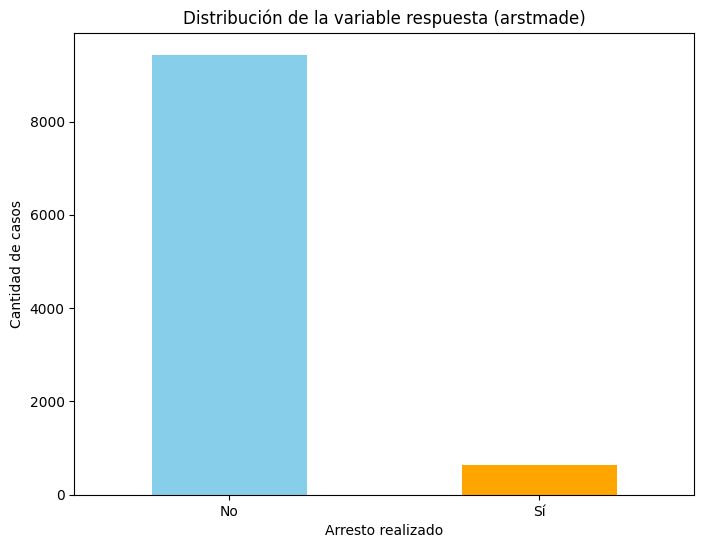

In [42]:
import matplotlib.pyplot as plt

# Contar los valores de la variable respuesta 'arstmade'
arstmade_counts = datos_filtrados_final['arstmade'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de 'arstmade'
plt.figure(figsize=(8, 6))
arstmade_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de la variable respuesta (arstmade)')
plt.xlabel('Arresto realizado')
plt.ylabel('Cantidad de casos')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], rotation=0)
plt.show()


  - 4.2.- Estudie la relación de la variable respuesta en
comportamiento con la raza (race), comente.



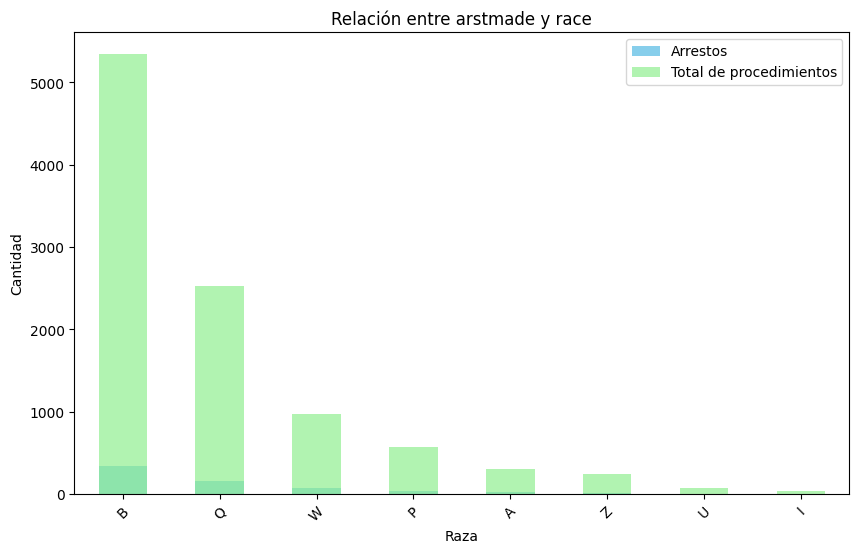

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df que contiene tus datos

# Contar la cantidad de arrestos por raza
arrestos_por_raza = df[df['arstmade'] == 'Y']['race'].value_counts()

# Contar la cantidad total de procedimientos policiales por raza
total_por_raza = df['race'].value_counts()

# Crear un gráfico de barras para visualizar la relación
plt.figure(figsize=(10, 6))
arrestos_por_raza.plot(kind='bar', color='skyblue', label='Arrestos')
total_por_raza.plot(kind='bar', color='lightgreen', alpha=0.7, label='Total de procedimientos')
plt.title('Relación entre arstmade y race')
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=45)
plt.show()


  - 4.3 Estudie la relación de la variable respuesta en
comportamiento con la sexo (sex), comente.


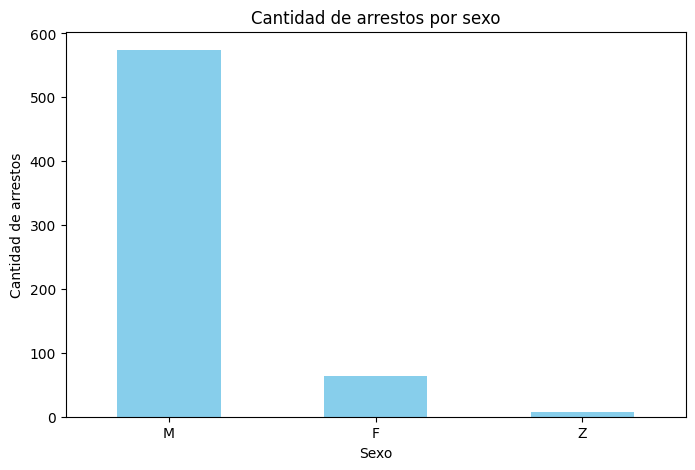

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df que contiene tus datos

# Calcular la cantidad de arrestos por sexo
arrestos_por_sexo = df[df['arstmade'] == 'Y']['sex'].value_counts()

# Crear un gráfico de barras para visualizar la relación
plt.figure(figsize=(8, 5))
arrestos_por_sexo.plot(kind='bar', color='skyblue')
plt.title('Cantidad de arrestos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de arrestos')
plt.xticks(rotation=0)
plt.show()



In [45]:
print(type(arrestos_por_sexo))


<class 'pandas.core.series.Series'>


In [46]:
print(arrestos_por_sexo)


M    574
F     64
Z      8
Name: sex, dtype: int64


  - 4.3 Estudie la relación de la variable respuesta en
comportamiento con la sexo y la edad en su conjunto, comente.


<ipython-input-47-63850248344f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=arrestos_df, x='sex', y='age', palette='Set2')


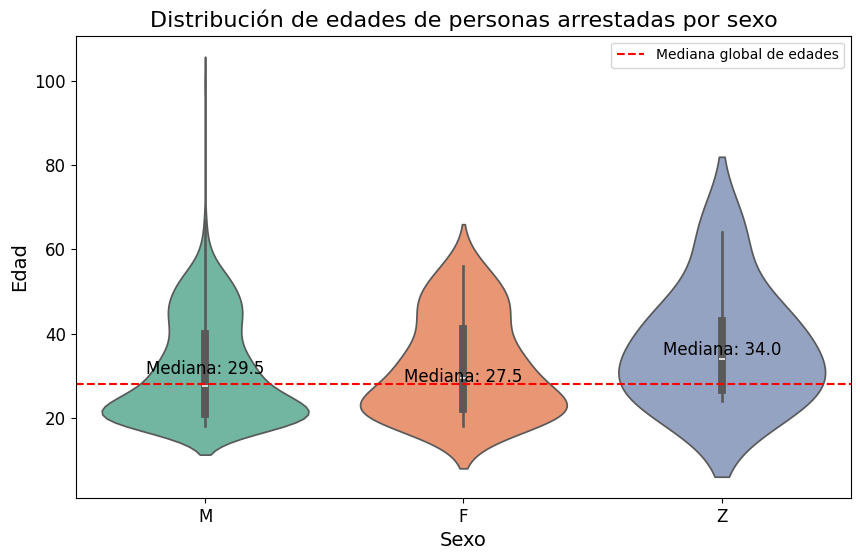

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Filtrar el DataFrame para obtener únicamente las observaciones donde se realizó un arresto
arrestos_df = df[df['arstmade'] == 'Y']

# Crear un gráfico de violín para visualizar la distribución de edades por sexo
sns.violinplot(data=arrestos_df, x='sex', y='age', palette='Set2')

# Añadir título y etiquetas de ejes
plt.title('Distribución de edades de personas arrestadas por sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Edad', fontsize=14)

# Añadir etiquetas a los violines para indicar la mediana
for i in range(len(arrestos_df['sex'].unique())):
    plt.text(i, arrestos_df.groupby('sex')['age'].median().iloc[i],
             f"Mediana: {arrestos_df.groupby('sex')['age'].median().iloc[i]}",
             ha='center', va='bottom', fontsize=12)

# Añadir línea horizontal para indicar la mediana global de edades
plt.axhline(arrestos_df['age'].median(), color='red', linestyle='--', label='Mediana global de edades')

# Mostrar leyenda
plt.legend()

# Ajustar diseño y estilo
sns.set(style='whitegrid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


  - 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es
Y


In [48]:
# Recodificar la variable respuesta arstmade a 1 y 0
df['arstmade'] = df['arstmade'].replace({'N': 0, 'Y': 1})

# Verificar los cambios
print(df['arstmade'].value_counts())


0    9432
1     646
Name: arstmade, dtype: int64


<ipython-input-48-9b79fd38e135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arstmade'] = df['arstmade'].replace({'N': 0, 'Y': 1})


  - 4.5 Muestre en un gráfico la probabilidad que un individuo sea
arrestado, condicional al género y a la raza. ¿qué implicancias
éticas tienen algunas conclusiones de lo que observa?.

---



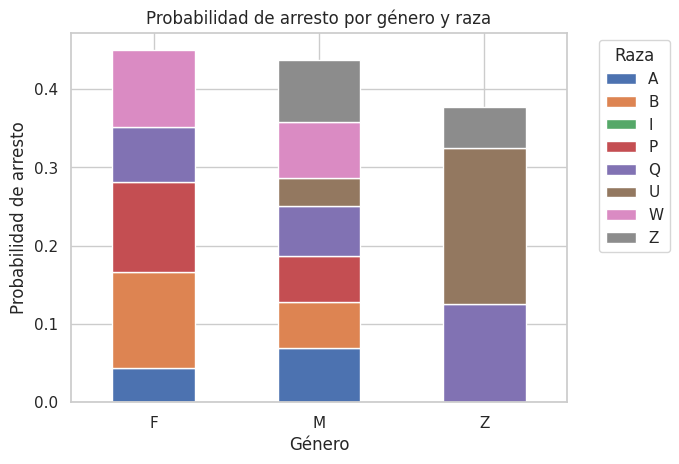

In [49]:
import matplotlib.pyplot as plt

# Calcular la probabilidad de arresto condicional al género y a la raza
prob_arresto = df.groupby(['sex', 'race'])['arstmade'].mean().unstack()

# Graficar
prob_arresto.plot(kind='bar', stacked=True)
plt.title('Probabilidad de arresto por género y raza')
plt.xlabel('Género')
plt.ylabel('Probabilidad de arresto')
plt.legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


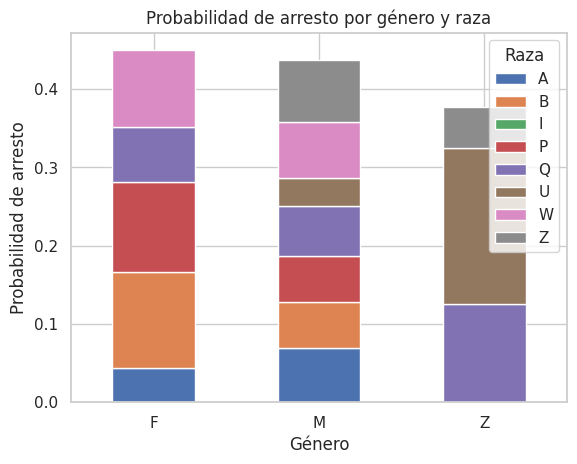

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la probabilidad de arresto por género y raza
prob_arresto = df.groupby(['sex', 'race'])['arstmade'].mean().unstack()

# Graficar
prob_arresto.plot(kind='bar', stacked=True)
plt.title('Probabilidad de arresto por género y raza')
plt.xlabel('Género')
plt.ylabel('Probabilidad de arresto')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x
plt.legend(title='Raza')
plt.show()


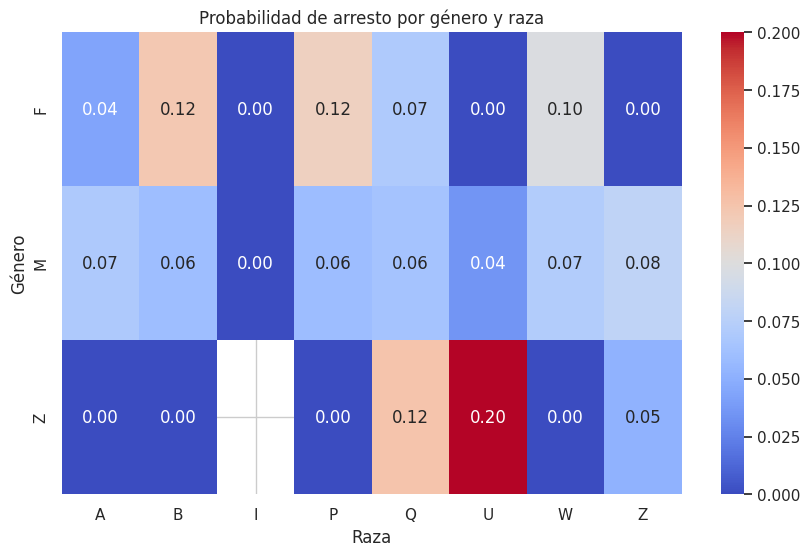

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la probabilidad de arresto por género y raza
prob_arresto = df.groupby(['sex', 'race'])['arstmade'].mean().unstack()

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(prob_arresto, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Probabilidad de arresto por género y raza')
plt.xlabel('Raza')
plt.ylabel('Género')
plt.show()


<ipython-input-56-732e50c080ef>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


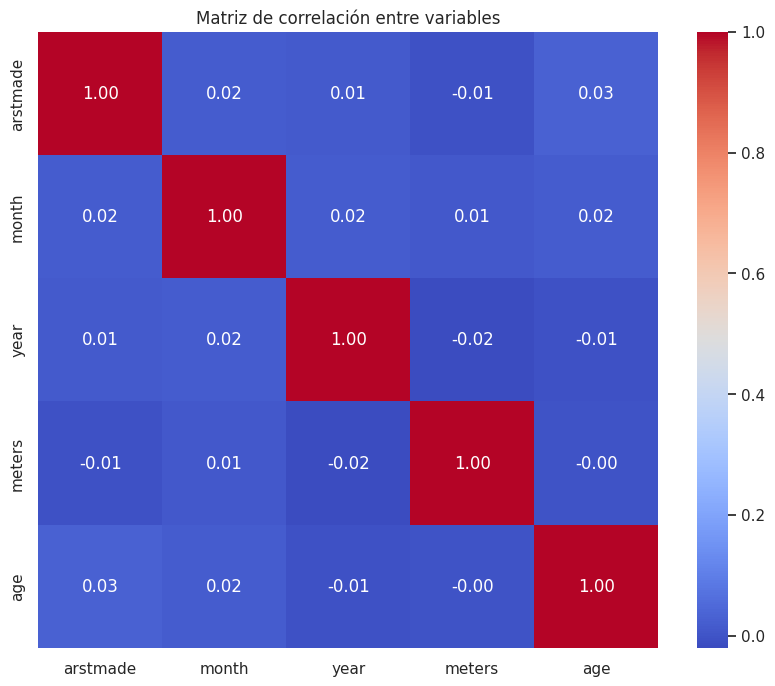

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()


# 5. Comparacion


5. Determinar si el procedimiento policial concluirá en alguna acción
violenta.
  - Los atributos que tienen el prefijo
  pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y
['pf_other'])
indican si hubo fuerza fisica utilizada por el oficial al
momento del procedimiento, con la marca 'Y'.
Genere una nueva variable llamada 'violencia' la cual sea 1 si en
cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego
indique el porcentaje de casos que terminaron con violencia.



In [57]:
# Crear una nueva variable 'violencia' que sea 1 si alguna de las variables pf es 'Y', y 0 en otro caso
df['violencia'] = df[['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)

# Calcular el porcentaje de casos que terminaron con violencia
porcentaje_violencia = (df['violencia'].sum() / len(df)) * 100

print("Porcentaje de casos que terminaron con violencia:", porcentaje_violencia)


Porcentaje de casos que terminaron con violencia: 24.181385195475293


<ipython-input-57-9b221369e528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['violencia'] = df[['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)


In [58]:
df_copy = df.copy()
df_copy['violencia'] = df_copy[['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)


In [59]:
# Contar los casos con violencia
casos_con_violencia = df_copy['violencia'].sum()

# Calcular el porcentaje
porcentaje_violencia = (casos_con_violencia / len(df_copy)) * 100

print("Porcentaje de casos que terminaron con violencia:", porcentaje_violencia)


Porcentaje de casos que terminaron con violencia: 24.181385195475293


In [60]:
df_copy

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,city,sector,beat,dettypcm,linecm,month,year,meters,age,violencia
0,A,O,P,P,Y,N,0,N,Y,N,...,BRONX,G,7,CM,1,4,2009,1.7526,24,0
2,1,O,P,V,Y,N,0,N,N,N,...,BRONX,E,U,CM,1,10,2009,1.9050,21,0
3,A,O,P,P,Y,N,0,N,Y,N,...,BROOKLYN,J,4,CM,1,12,2009,1.6510,22,0
4,A,O,P,P,Y,Y,0,N,Y,N,...,QUEENS,H,U,CM,1,12,2009,1.6764,18,0
5,1,I,T,V,Y,N,0,N,N,Y,...,MANHATTAN,F,16,CM,1,5,2009,1.7272,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,1,O,P,P,Y,Y,0,N,N,N,...,QUEENS,A,U,CM,1,6,2010,1.6764,21,0
11820,1,O,H,P,Y,N,0,N,Y,N,...,BROOKLYN,I,U,CM,1,9,2010,1.7780,20,1
11821,A,O,P,R,Y,N,0,N,N,N,...,BROOKLYN,A,U,CM,1,7,2010,1.7018,23,0
11823,1,O,P,P,Y,N,0,N,N,Y,...,QUEENS,E,U,CM,1,11,2010,1.8034,19,1


# 6. Modelacion


6. Modelación
  - 6.1 Genere las variables dummies correspondientes (Tenga
cuidado de no utilizar variables que expliquen lo mismo,
¡recuerde que acaba de crear una variable a partir de otras!,
además recuerde que creó una variable numérica que es una
categoría :) ). Luego genere los sets de train-test utilizando el año
2009 para entrenar, y el año 2010 para testear.


In [61]:
# Obtener solo las columnas que son variables categóricas
df_categorico = df_copy.select_dtypes(include=['object'])

# Mostrar las columnas seleccionadas
print(df_categorico.columns)


Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn',
       'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands',
       'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff',
       'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim',
       'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng',
       'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc',
       'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other',
       'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg',
       'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build',
       'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm'],
      dtype='object')


In [62]:
df_categorico

,recstat,inout,trhsloc,typeofid,explnstp,othpers,sumissue,offunif,officrid,frisked,...,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm
0,A,O,P,P,Y,N,N,Y,N,N,...,B,BK,BR,M,L,BRONX,G,7,CM,1
2,1,O,P,V,Y,N,N,N,N,Y,...,Q,BR,BR,M,L,BRONX,E,U,CM,1
3,A,O,P,P,Y,N,N,Y,N,N,...,B,BK,BR,T,L,BROOKLYN,J,4,CM,1
4,A,O,P,P,Y,Y,N,Y,N,Y,...,Q,BK,BR,M,L,QUEENS,H,U,CM,1
5,1,I,T,V,Y,N,N,N,Y,Y,...,B,BK,BR,M,L,MANHATTAN,F,16,CM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,1,O,P,P,Y,Y,N,N,N,N,...,Q,BR,BR,T,L,QUEENS,A,U,CM,1
11820,1,O,H,P,Y,N,N,Y,N,Y,...,B,BK,BR,T,L,BROOKLYN,I,U,CM,1
11821,A,O,P,R,Y,N,N,N,N,Y,...,Z,BK,BR,M,L,BROOKLYN,A,U,CM,1
11823,1,O,P,P,Y,N,N,N,Y,Y,...,Q,BK,BR,M,L,QUEENS,E,U,CM,1


In [63]:
# Generar variables dummies
df_dummies = pd.get_dummies(df_categorico)

# Concatenar las variables dummies al DataFrame original
df_final = pd.concat([df, df_dummies], axis=1)

# Eliminar las columnas originales que fueron convertidas en dummies
df_final = df_final.drop(df_categorico.columns, axis=1)

# Mostrar el nuevo DataFrame con las variables dummies
print(df_final.head())


   arstmade  month  year  meters  age  violencia  recstat_1  recstat_A  \
0         0      4  2009  1.7526   24          0          0          1   
2         0     10  2009  1.9050   21          0          1          0   
3         0     12  2009  1.6510   22          0          0          1   
4         0     12  2009  1.6764   18          0          0          1   
5         0      5  2009  1.7272   47          0          1          0   

   inout_I  inout_O  ...  beat_62  beat_7  beat_8  beat_9  beat_U  dettypcm_   \
0        0        1  ...        0       1       0       0       0           0   
2        0        1  ...        0       0       0       0       1           0   
3        0        1  ...        0       0       0       0       0           0   
4        0        1  ...        0       0       0       0       1           0   
5        1        0  ...        0       0       0       0       0           0   

   dettypcm_CM  linecm_1  linecm_   linecm_1  
0            1       

In [64]:

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
train_set = df_final[df_final['year'] == 2009]
test_set = df_final[df_final['year'] == 2010]

# Separar las características (X) y la variable respuesta (y) en ambos conjuntos
X_train = train_set.drop(['arstmade'], axis=1)
y_train = train_set['arstmade']
X_test = test_set.drop(['arstmade'], axis=1)
y_test = test_set['arstmade']


  - 6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo
bajo algún criterio. Utilice validación cruzada de al menos 2 folds
para probar distintos hiperparámetros para cada modelo (puede
probar cualquier hiperparámetro, pero debe ser al menos uno).



In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
'''
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_final.drop('arstmade', axis=1)
y = df_final['arstmade']

# Dividir los datos en conjuntos de entrenamiento y prueba (utilizando los años 2009 y 2010)
X_train, X_test = X[df_final['year'] == 2009], X[df_final['year'] == 2010]
y_train, y_test = y[df_final['year'] == 2009], y[df_final['year'] == 2010]

'''

# Definir modelos de clasificación
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Entrenar y evaluar modelos utilizando validación cruzada
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)
    print(f"{name}: Precisión de validación cruzada: {cv_scores.mean()}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Precisión de validación cruzada: 0.9651093631534777
Random Forest: Precisión de validación cruzada: 0.9663124913350003
Support Vector Machine: Precisión de validación cruzada: 0.9390415054695247
Decision Tree: Precisión de validación cruzada: 0.953078000920621


In [66]:
# Entrenar el mejor modelo en el conjunto de entrenamiento completo y evaluar en el conjunto de prueba
best_model = RandomForestClassifier()  # Supongamos que el mejor modelo es Random Forest
best_model.fit(X_train, y_train)
test_score = accuracy_score(y_test, best_model.predict(X_test))
print(f"Mejor modelo (Random Forest) - Precisión en conjunto de prueba: {test_score}")


Mejor modelo (Random Forest) - Precisión en conjunto de prueba: 0.9670005892751915


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo de Regresión Logística
model = LogisticRegression(max_iter=10000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas de clase en los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.96503633863681
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.84      0.59      0.69       342

    accuracy                           0.97      5091
   macro avg       0.91      0.79      0.84      5091
weighted avg       0.96      0.97      0.96      5091



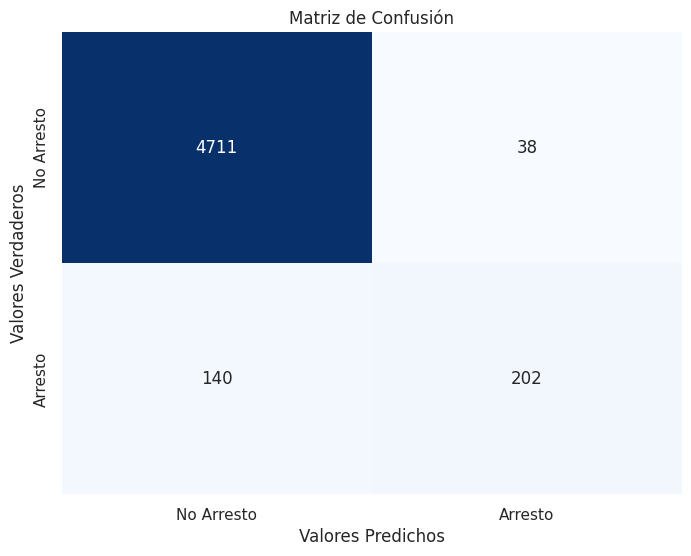

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Arresto', 'Arresto'], yticklabels=['No Arresto', 'Arresto'])
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()

In [69]:
# 2. Instanciar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# 3. Entrenar el modelo
tree_model.fit(X_train, y_train)

# 4. Predecir las etiquetas de clase en los datos de prueba
y_pred = tree_model.predict(X_test)

# 5. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", accuracy)

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo de árbol de decisión: 0.9630720879984286
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.87      0.53      0.66       342

    accuracy                           0.96      5091
   macro avg       0.92      0.76      0.82      5091
weighted avg       0.96      0.96      0.96      5091



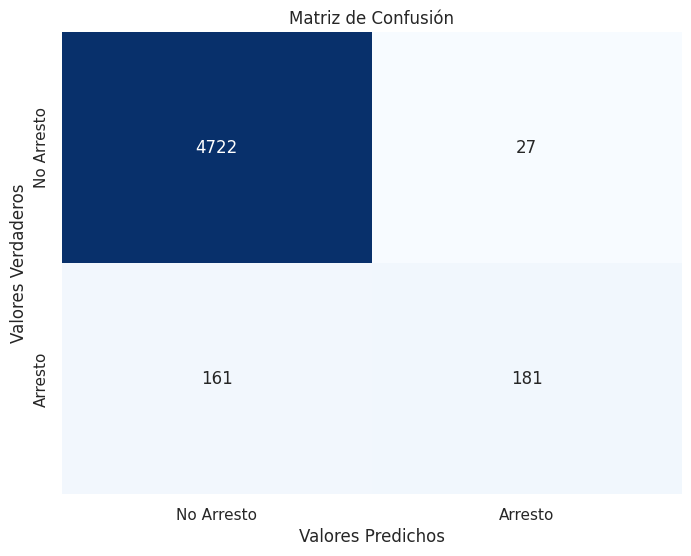

In [70]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Arresto', 'Arresto'], yticklabels=['No Arresto', 'Arresto'])
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()

In [71]:
# 2. Instanciar el modelo de Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Entrenar el modelo
rf_model.fit(X_train, y_train)

# 4. Predecir las etiquetas de clase en los datos de prueba
y_pred = rf_model.predict(X_test)

# 5. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest Classifier:", accuracy)

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo de Random Forest Classifier: 0.9670005892751915
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.88      0.59      0.71       342

    accuracy                           0.97      5091
   macro avg       0.93      0.79      0.84      5091
weighted avg       0.96      0.97      0.96      5091



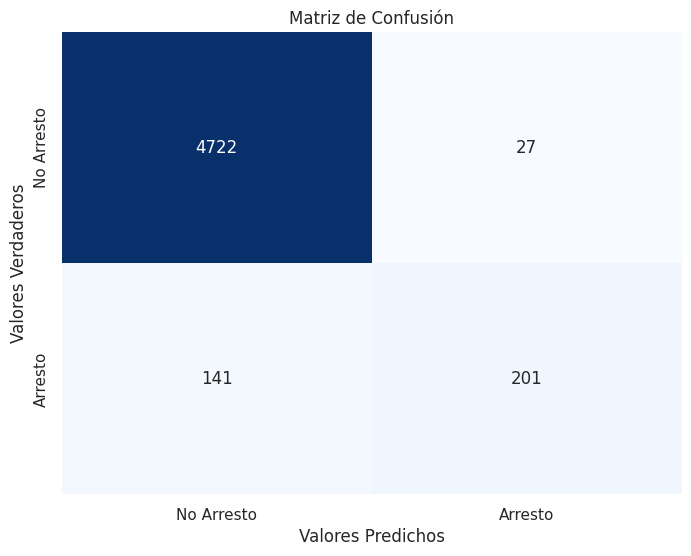

In [72]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Arresto', 'Arresto'], yticklabels=['No Arresto', 'Arresto'])
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Instanciar el modelo de Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 3. Entrenar el modelo
gb_model.fit(X_train, y_train)

# 4. Predecir las etiquetas de clase en los datos de prueba
y_pred = gb_model.predict(X_test)

# 5. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Gradient Boosting Classifier:", accuracy)

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo de Gradient Boosting Classifier: 0.9644470634452956
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.80      0.62      0.70       342

    accuracy                           0.96      5091
   macro avg       0.89      0.81      0.84      5091
weighted avg       0.96      0.96      0.96      5091



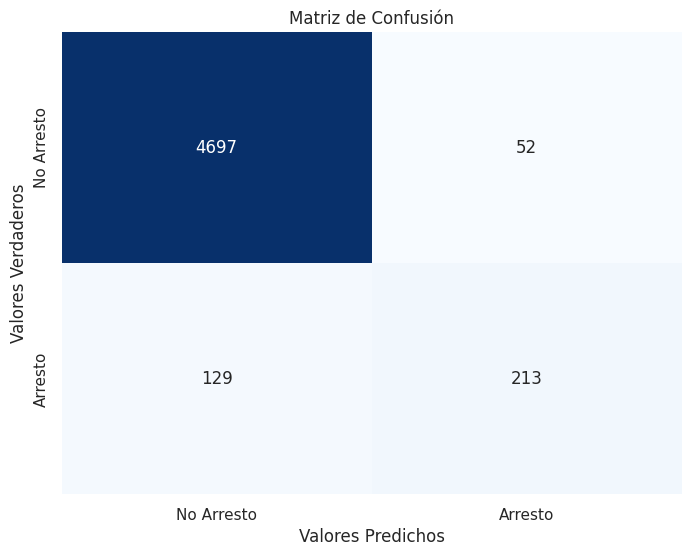

In [74]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Arresto', 'Arresto'], yticklabels=['No Arresto', 'Arresto'])
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [75]:
# Definir los hiperparámetros para cada modelo
param_grid_logistic = {'C': [0.1, 1, 10]}  # hiperparámetro C para la regresión logística
param_grid_decision_tree = {'max_depth': [None, 5, 10]}  # hiperparámetro max_depth para el árbol de decisión
param_grid_random_forest = {'n_estimators': [50, 100, 200]}  # hiperparámetro n_estimators para el random forest
param_grid_gradient_boosting = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}  # hiperparámetros para el gradient boosting


In [76]:
# Regresión Logística
logistic_model =  LogisticRegression(max_iter=10000)
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=2)
grid_search_logistic.fit(X_train, y_train)

# Árbol de Decisión
decision_tree_model = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=2)
grid_search_decision_tree.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestClassifier()
grid_search_random_forest = GridSearchCV(random_forest_model, param_grid_random_forest, cv=2)
grid_search_random_forest.fit(X_train, y_train)

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
grid_search_gradient_boosting = GridSearchCV(gradient_boosting_model, param_grid_gradient_boosting, cv=2)
grid_search_gradient_boosting.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [77]:
# Mejores hiperparámetros y puntuación para cada modelo
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_

best_params_decision_tree = grid_search_decision_tree.best_params_
best_score_decision_tree = grid_search_decision_tree.best_score_

best_params_random_forest = grid_search_random_forest.best_params_
best_score_random_forest = grid_search_random_forest.best_score_

best_params_gradient_boosting = grid_search_gradient_boosting.best_params_
best_score_gradient_boosting = grid_search_gradient_boosting.best_score_


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo dee random
rf = random_forest_model

# Definir los hiperparámetros a probar
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(rf, param_grid_random_forest, cv=2)

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener la mejor puntuación (precisión media) obtenida durante la validación cruzada
best_score = grid_search.best_score_
print("Mejor precisión media durante la validación cruzada:", best_score)

# Obtener el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Predecir las etiquetas de clase en los datos de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Mejores hiperparámetros: {'n_estimators': 100}
Mejor precisión media durante la validación cruzada: 0.9665136158308218
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.85      0.59      0.70       342

    accuracy                           0.97      5091
   macro avg       0.91      0.79      0.84      5091
weighted avg       0.96      0.97      0.96      5091



In [79]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Random Forest Classifier
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Classifier - Cross Validation Scores:")
print(rf_scores)
print("Mean Accuracy:", rf_scores.mean())

# Validación cruzada para Gradient Boosting Classifier
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nGradient Boosting Classifier - Cross Validation Scores:")
print(gb_scores)
print("Mean Accuracy:", gb_scores.mean())

# Validación cruzada para Logistic Regression Classifier
lr_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression Classifier - Cross Validation Scores:")
print(lr_scores)
print("Mean Accuracy:", lr_scores.mean())


Random Forest Classifier - Cross Validation Scores:
[0.96392786 0.96492986 0.97492477 0.97091274 0.96790371]
Mean Accuracy: 0.9685197878203748

Gradient Boosting Classifier - Cross Validation Scores:
[0.96793587 0.96693387 0.97392177 0.97291876 0.96489468]
Mean Accuracy: 0.9693209890191617

Logistic Regression Classifier - Cross Validation Scores:
[0.96793587 0.96192385 0.97693079 0.96790371 0.96088265]
Mean Accuracy: 0.9671153741786481


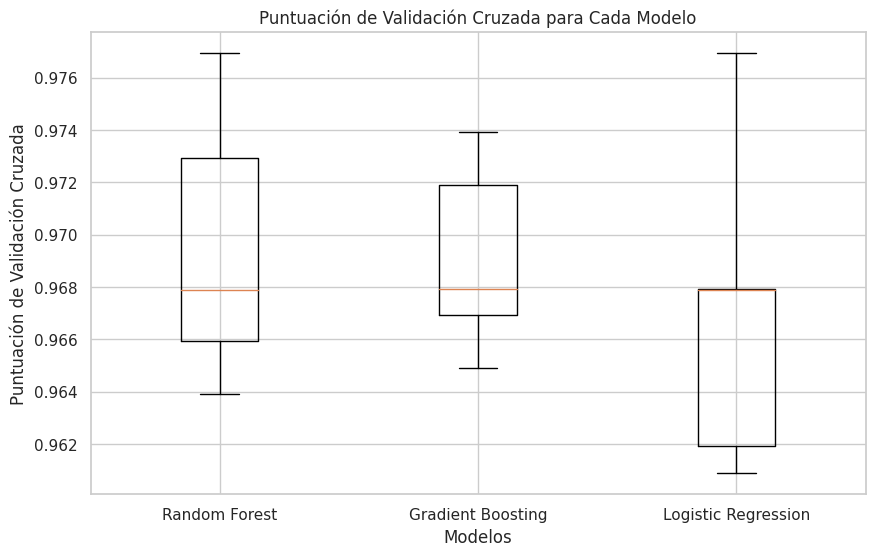

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Definir los modelos y sus nombres
models = [random_forest_model, gradient_boosting_model, logistic_model]
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']

# Realizar validación cruzada para cada modelo
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Utilizamos 5 pliegues
    cv_scores.append(scores)

# Graficar las puntuaciones de validación cruzada para cada modelo
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, labels=model_names)
plt.xlabel('Modelos')
plt.ylabel('Puntuación de Validación Cruzada')
plt.title('Puntuación de Validación Cruzada para Cada Modelo')
plt.show()


In [81]:
# Imprimir las puntuaciones de validación cruzada para cada modelo
for i, model_name in enumerate(model_names):
    print(f"Puntuaciones de Validación Cruzada para {model_name}: {cv_scores[i]}")


Puntuaciones de Validación Cruzada para Random Forest: [0.96593186 0.96392786 0.97693079 0.97291876 0.96790371]
Puntuaciones de Validación Cruzada para Gradient Boosting: [0.96693387 0.96793587 0.97392177 0.97191575 0.96489468]
Puntuaciones de Validación Cruzada para Logistic Regression: [0.96793587 0.96192385 0.97693079 0.96790371 0.96088265]


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo Gradient Boosting Classifier con hiperparámetros
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# Realizar validación cruzada con 5 folds
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir los scores de validación cruzada
print("Scores de Validación Cruzada para Gradient Boosting Classifier:", cv_scores_gb)

# Calcular el promedio de los scores de validación cruzada
mean_cv_score_gb = cv_scores_gb.mean()
print("Promedio de los Scores de Validación Cruzada para Gradient Boosting Classifier:", mean_cv_score_gb)


Scores de Validación Cruzada para Gradient Boosting Classifier: [0.96492986 0.96793587 0.97191575 0.97191575 0.96389168]
Promedio de los Scores de Validación Cruzada para Gradient Boosting Classifier: 0.9681177801942902


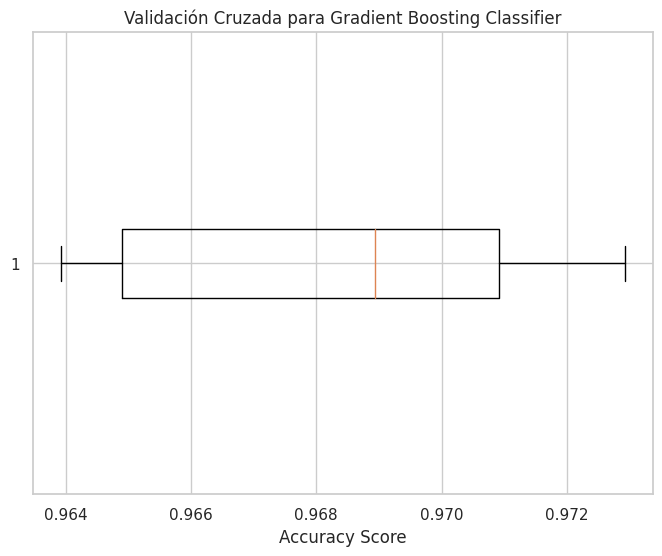

In [ ]:
import matplotlib.pyplot as plt

# Graficar los scores de validación cruzada para Gradient Boosting Classifier
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores_gb, vert=False)
plt.xlabel('Accuracy Score')
plt.title('Validación Cruzada para Gradient Boosting Classifier')
plt.show()


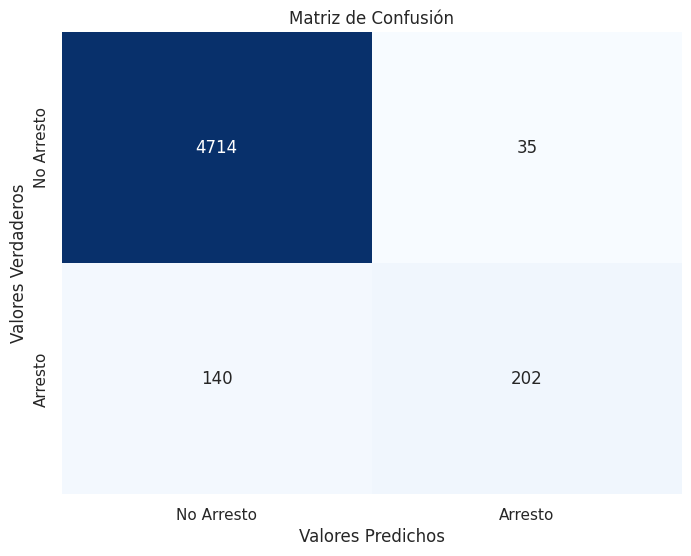

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Arresto', 'Arresto'], yticklabels=['No Arresto', 'Arresto'])
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()


# 7. Bonus

7. Bonus (20 pts)
  ¿Qué puede hacer para mejorar la predicción de los modelos?

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Selección de características (Feature Selection)
# Supongamos que X_train y X_test son nuestros conjuntos de entrenamiento y prueba

# 2. Tuning de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# 3. Balanceo de clases
# Supongamos que y_train es nuestra variable objetivo
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# 4. Ensemble Learning
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 5. Regularización
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr_model.fit(X_train, y_train)

# Evaluación de los modelos
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.87      0.59      0.71       342

    accuracy                           0.97      5091
   macro avg       0.92      0.79      0.84      5091
weighted avg       0.96      0.97      0.96      5091

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.80      0.62      0.70       342

    accuracy                           0.96      5091
   macro avg       0.89      0.81      0.84      5091
weighted avg       0.96      0.96      0.96      5091

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.79      0.60      0.68       342

    accuracy                           0.96      5091
   macro avg       0.88      0.79      0

In [ ]:

# 4. Ensemble Learning
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 5. Regularización
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr_model.fit(X_train, y_train)

# Evaluación de los modelos
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))

In [86]:
# Realizar validación cruzada con 5 folds
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir los scores de validación cruzada
print("Scores de Validación Cruzada para Gradient Boosting Classifier:", cv_scores_gb)

# Calcular el promedio de los scores de validación cruzada
mean_cv_score_gb = cv_scores_gb.mean()
print("Promedio de los Scores de Validación Cruzada para Gradient Boosting Classifier:", mean_cv_score_gb)

Scores de Validación Cruzada para Gradient Boosting Classifier: [0.96793587 0.96693387 0.97392177 0.97291876 0.96489468]
Promedio de los Scores de Validación Cruzada para Gradient Boosting Classifier: 0.9693209890191617


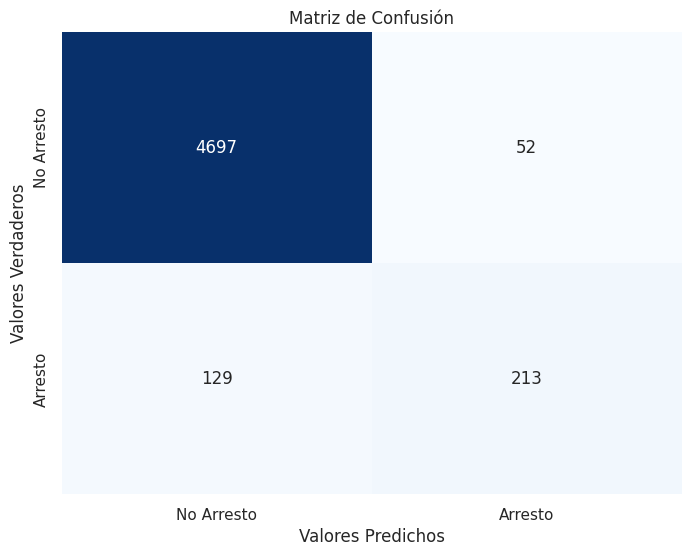

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_gb)

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Arresto', 'Arresto'], yticklabels=['No Arresto', 'Arresto'])
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()


● Estadística Descriptiva.
https://www.dm.uba.ar/materias/estadistica_Q/2011/1/modulo%20descriptiva.pdf

In [ ]:
import sys

# Obtener todas las bibliotecas importadas
imported_packages = [package.split('.')[0] for package in sys.modules.keys()]

# Eliminar duplicados
imported_packages = list(set(imported_packages))

In [ ]:
imported_packages

['_cython_0_29_36',
 '_sitebuiltins',
 'ast',
 '_sha512',
 '_pydevd_bundle',
 'pstats',
 'types',
 'keyword',
 '__main__',
 '_random',
 'select',
 'plistlib',
 'bdb',
 'PIL',
 'socks',
 'codecs',
 'ipykernel',
 'pkgutil',
 '_signal',
 'site',
 'ipython_genutils',
 'cython_runtime',
 'inspect',
 'sre_parse',
 'uu',
 'enum',
 'dateutil',
 'concurrent',
 '_stat',
 '_frozen_importlib_external',
 'argparse',
 'sysconfig',
 'six',
 'posixpath',
 'zmq',
 'jupyter_client',
 'fcntl',
 '_socket',
 'opcode',
 'pdb',
 'array',
 '_struct',
 'profile',
 'secrets',
 'pprint',
 '_locale',
 'random',
 '_blake2',
 '_json',
 '_bz2',
 'configparser',
 '_uuid',
 'token',
 'base64',
 '_ast',
 'binascii',
 '_lsprof',
 'pathlib',
 'grp',
 'os',
 'pyparsing',
 'shutil',
 '_decimal',
 'pty',
 'psutil',
 'faulthandler',
 'matplotlib',
 '_abc',
 'pwd',
 'google',
 'signal',
 '_opcode',
 'prompt_toolkit',
 'linecache',
 'storemagic',
 '_heapq',
 'jupyter_core',
 'termios',
 'traceback',
 'sre_compile',
 'defusedxm

In [ ]:
import pkg_resources

# Obtener los paquetes instalados en el entorno
installed_packages = pkg_resources.working_set

# Imprimir los nombres de los paquetes instalados
for package in installed_packages:
    print(package)


Babel 2.14.0
Cython 3.0.8
Flask 2.2.5
GDAL 3.6.4
Jinja2 3.1.3
Markdown 3.5.2
MarkupSafe 2.1.5
Pillow 9.4.0
PyDrive 1.3.1
PyDrive2 1.6.3
PyOpenGL 3.1.7
PySocks 1.7.1
PyYAML 6.0.1
Pygments 2.16.1
SQLAlchemy 2.0.27
Send2Trash 1.8.2
Sphinx 5.0.2
absl-py 1.4.0
aiohttp 3.9.3
aiosignal 1.3.1
alabaster 0.7.16
albumentations 1.3.1
altair 4.2.2
annotated-types 0.6.0
anyio 3.7.1
appdirs 1.4.4
argon2-cffi 23.1.0
argon2-cffi-bindings 21.2.0
array-record 0.5.0
arviz 0.15.1
astropy 5.3.4
astunparse 1.6.3
async-timeout 4.0.3
atpublic 4.0
attrs 23.2.0
audioread 3.0.1
autograd 1.6.2
backcall 0.2.0
beautifulsoup4 4.12.3
bidict 0.23.0
bigframes 0.21.0
bleach 6.1.0
blis 0.7.11
blosc2 2.0.0
bokeh 3.3.4
bqplot 0.12.42
branca 0.7.1
build 1.0.3
cachecontrol 0.14.0
cachetools 5.3.2
catalogue 2.0.10
certifi 2024.2.2
cffi 1.16.0
chardet 5.2.0
charset-normalizer 3.3.2
chex 0.1.85
click 8.1.7
click-plugins 1.1.1
cligj 0.7.2
cloudpathlib 0.16.0
cloudpickle 2.2.1
cmake 3.27.9
cmdstanpy 1.2.1
colorcet 3.0.1
colorlover